In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors 
import datetime as dt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("data.csv")

df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

## What is the avg time, salary worked of employees who left the compony 

In [5]:
time_worked_df = df[df["DOL"] != "present"]

time_worked_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
6,train,947847,300000.0,8/1/14 0:00,5/1/15 0:00,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,train,912934,400000.0,7/1/14 0:00,7/1/15 0:00,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
10,train,87291,600000.0,4/1/11 0:00,4/1/15 0:00,senior php developer,Bangalore,m,6/24/89 0:00,88.60,...,-1,-1,-1,-1,-1,0.0464,0.8128,0.0914,0.17980,0.0284
11,train,190393,450000.0,8/1/11 0:00,10/1/14 0:00,senior systems engineer,Pune,m,2/10/90 0:00,81.00,...,-1,-1,-1,-1,-1,-2.2720,1.1248,0.8171,-0.40780,-0.4455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,train,230873,630000.0,7/1/11 0:00,10/1/14 0:00,systems analyst,Bangalore,m,5/20/90 0:00,80.00,...,-1,-1,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284
3992,train,344407,800000.0,4/1/14 0:00,4/1/15 0:00,manager,Rajkot,m,6/22/90 0:00,73.00,...,-1,-1,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943


In [6]:
time_worked_df["DOJ"] = pd.to_datetime(time_worked_df["DOJ"])
time_worked_df["DOL"] = pd.to_datetime(time_worked_df["DOL"])

C:\Users\nehan\AppData\Local\Temp\ipykernel_20692\101069512.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_worked_df["DOJ"] = pd.to_datetime(time_worked_df["DOJ"])
C:\Users\nehan\AppData\Local\Temp\ipykernel_20692\101069512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_worked_df["DOJ"] = pd.to_datetime(time_worked_df["DOJ"])
C:\Users\nehan\AppData\Local\Temp\ipykernel_20692\101069512.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_worked_df["

In [7]:
time_worked_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2123 entries, 4 to 3996
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2123 non-null   object        
 1   ID                     2123 non-null   int64         
 2   Salary                 2123 non-null   float64       
 3   DOJ                    2123 non-null   datetime64[ns]
 4   DOL                    2123 non-null   datetime64[ns]
 5   Designation            2123 non-null   object        
 6   JobCity                2123 non-null   object        
 7   Gender                 2123 non-null   object        
 8   DOB                    2123 non-null   object        
 9   10percentage           2123 non-null   float64       
 10  10board                2123 non-null   object        
 11  12graduation           2123 non-null   int64         
 12  12percentage           2123 non-null   float64       
 13  12board 

In [8]:
time_worked_df["time_of_work"] = time_worked_df["DOL"] - time_worked_df["DOJ"]

time_worked_df

C:\Users\nehan\AppData\Local\Temp\ipykernel_20692\4279828758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_worked_df["time_of_work"] = time_worked_df["DOL"] - time_worked_df["DOJ"]


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,time_of_work
4,train,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,365 days
6,train,947847,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,273 days
7,train,912934,400000.0,2014-07-01,2015-07-01,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,...,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470,365 days
10,train,87291,600000.0,2011-04-01,2015-04-01,senior php developer,Bangalore,m,6/24/89 0:00,88.60,...,-1,-1,-1,-1,0.0464,0.8128,0.0914,0.17980,0.0284,1461 days
11,train,190393,450000.0,2011-08-01,2014-10-01,senior systems engineer,Pune,m,2/10/90 0:00,81.00,...,-1,-1,-1,-1,-2.2720,1.1248,0.8171,-0.40780,-0.4455,1157 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,train,230873,630000.0,2011-07-01,2014-10-01,systems analyst,Bangalore,m,5/20/90 0:00,80.00,...,-1,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284,1188 days
3992,train,344407,800000.0,2014-04-01,2015-04-01,manager,Rajkot,m,6/22/90 0:00,73.00,...,-1,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229,365 days
3993,train,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,366 days
3994,train,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0 days


In [9]:
avg = time_worked_df["time_of_work"].mean()

avg

Timedelta('460 days 11:40:40.131888840')

### Ans: avg time ---> 460 days 11:40:40.131888840

In [10]:
avg_salary = time_worked_df["Salary"].mean()

avg_salary

274236.92887423455

### Ans: avg salary ---> 274236.92887423455

## Count of employees still working and find no of employees have more than 1000000 salary

In [11]:
present = df[df['DOL'] == "present"].value_counts()

len(present)

1875

In [12]:
present1 = df[(df['DOL'] == "present") & (df["Salary"] > 1000000)].value_counts()

len(present1)

16

### Ans: count of all ---> 1875 and greater than 10000000 ---> 16

## Avg salary employees who are still working

In [13]:
present_df = df[df['DOL'] == "present"]

present_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
5,train,1027655,300000.0,6/1/14 0:00,present,system engineer,Hyderabad,m,7/2/92 0:00,89.92,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,train,439787,280000.0,11/1/12 0:00,present,network engineer,New Delhi,f,1/16/90 0:00,86.70,...,-1,-1,-1,-1,-1,-1.4992,-1.8393,-0.7794,1.47240,-2.3017
3989,train,1204604,300000.0,9/1/14 0:00,present,software engineer,Bangalore,m,11/23/91 0:00,74.88,...,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721
3990,train,204287,480000.0,2/1/12 0:00,present,senior systems engineer,Hyderabad,f,9/4/89 0:00,88.00,...,-1,-1,-1,233,-1,0.6646,0.3448,0.3817,-1.34780,0.8183
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


In [14]:
avg_salary = present_df["Salary"].mean()

avg_salary

345588.8

### Ans: 345588.8

## What is the 10th, 12th and College percentile of highest salary employee. Plot an effective graph

In [15]:
high_salary = df["Salary"].max()

high_salary

4000000.0

In [16]:
high_salary_df = df[df["Salary"] == 4000000.0]

high_salary_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1237,train,48107,4000000.0,7/1/10 0:00,3/1/15 0:00,senior software engineer,New Delhi,m,9/9/87 0:00,90.83,...,-1,-1,-1,-1,-1,-0.7264,0.0328,-1.6502,-0.8778,-0.1295
2182,train,41147,4000000.0,1/1/10 0:00,12/1/11 0:00,automation engineer,gurgaon,m,9/13/87 0:00,53.00,...,-1,-1,-1,-1,-1,-3.3539,-0.4353,-1.0697,-0.0552,-2.6572


In [17]:
high_salary_df[["ID","Salary","10percentage","12percentage","collegeGPA","DOJ","DOL","Designation","Specialization","English","Logical","Domain"]]

,ID,Salary,10percentage,12percentage,collegeGPA,DOJ,DOL,Designation,Specialization,English,Logical,Domain
1237,48107,4000000.0,90.83,88.77,72.6,7/1/10 0:00,3/1/15 0:00,senior software engineer,computer engineering,675,685,0.990009
2182,41147,4000000.0,53.00,61.00,65.0,1/1/10 0:00,12/1/11 0:00,automation engineer,computer application,405,455,0.525923


In [18]:
h_sal_df = high_salary_df[["ID","10percentage","12percentage","collegeGPA"]]

h_sal_df

,ID,10percentage,12percentage,collegeGPA
1237,48107,90.83,88.77,72.6
2182,41147,53.00,61.00,65.0


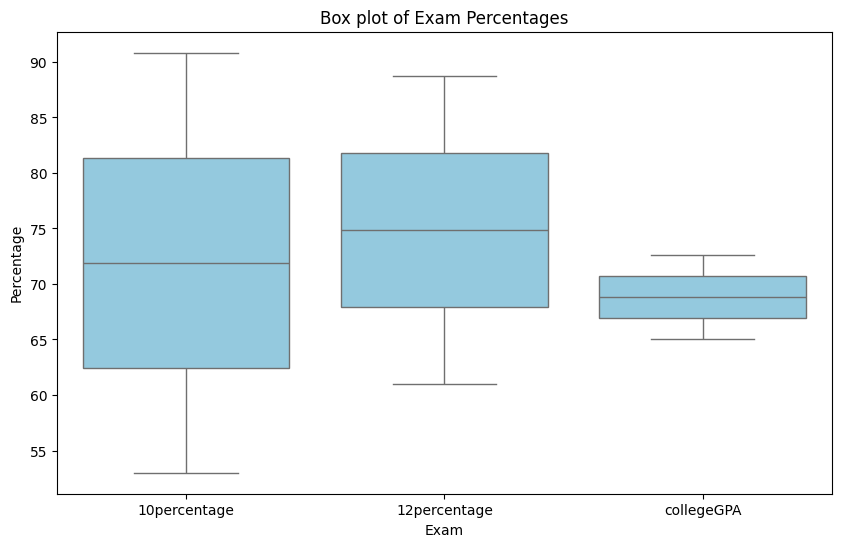

In [19]:
melted_df = h_sal_df.melt(id_vars='ID', var_name='Exam', value_name='Percentage')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam', y='Percentage', data=melted_df, color='skyblue')

plt.title('Box plot of Exam Percentages')
plt.xlabel('Exam')
plt.ylabel('Percentage')
plt.show()

## Compare men average salary and women salary

In [20]:
male_df = df[df["Gender"] == "m"]

female_df = df[df["Gender"] == "f"]

In [21]:
male_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,train,1027655,300000.0,6/1/14 0:00,present,system engineer,Hyderabad,m,7/2/92 0:00,89.92,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,train,947847,300000.0,8/1/14 0:00,5/1/15 0:00,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,train,1204604,300000.0,9/1/14 0:00,present,software engineer,Bangalore,m,11/23/91 0:00,74.88,...,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721
3991,train,230873,630000.0,7/1/11 0:00,10/1/14 0:00,systems analyst,Bangalore,m,5/20/90 0:00,80.00,...,-1,-1,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284
3992,train,344407,800000.0,4/1/14 0:00,4/1/15 0:00,manager,Rajkot,m,6/22/90 0:00,73.00,...,-1,-1,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194


In [22]:
male_df["Salary"].mean()

311716.21177244326

In [23]:
female_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
15,train,536517,350000.0,8/1/13 0:00,present,network engineer,-1,f,1/17/90 0:00,69.54,...,-1,-1,-1,-1,-1,1.7465,1.9048,0.6720,-0.29020,1.2528
19,train,466888,325000.0,9/1/14 0:00,present,software engineer,Pune,f,11/30/90 0:00,79.00,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295
20,train,140069,320000.0,11/1/10 0:00,9/1/12 0:00,software engineer,Bangalore,f,7/25/88 0:00,91.20,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,train,466661,200000.0,2/1/13 0:00,7/1/13 0:00,data analyst,Bangalore,f,5/15/91 0:00,74.40,...,-1,-1,-1,-1,-1,-0.5332,-0.1232,-0.0537,1.32550,0.5024
3990,train,204287,480000.0,2/1/12 0:00,present,senior systems engineer,Hyderabad,f,9/4/89 0:00,88.00,...,-1,-1,-1,233,-1,0.6646,0.3448,0.3817,-1.34780,0.8183
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [24]:
female_df["Salary"].mean()

294937.3040752351

### Ans: avg salary male = 311716.21177244326, female = 294937.3040752351

## Find the count of men and women who left the company and not left the company and for every thing find salary greater than 500000

In [25]:
time_worked_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,time_of_work
4,train,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,365 days
6,train,947847,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,273 days
7,train,912934,400000.0,2014-07-01,2015-07-01,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,...,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470,365 days
10,train,87291,600000.0,2011-04-01,2015-04-01,senior php developer,Bangalore,m,6/24/89 0:00,88.60,...,-1,-1,-1,-1,0.0464,0.8128,0.0914,0.17980,0.0284,1461 days
11,train,190393,450000.0,2011-08-01,2014-10-01,senior systems engineer,Pune,m,2/10/90 0:00,81.00,...,-1,-1,-1,-1,-2.2720,1.1248,0.8171,-0.40780,-0.4455,1157 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,train,230873,630000.0,2011-07-01,2014-10-01,systems analyst,Bangalore,m,5/20/90 0:00,80.00,...,-1,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284,1188 days
3992,train,344407,800000.0,2014-04-01,2015-04-01,manager,Rajkot,m,6/22/90 0:00,73.00,...,-1,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229,365 days
3993,train,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,366 days
3994,train,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0 days


In [26]:
len(time_worked_df[time_worked_df["Gender"] == "f"].value_counts())

509

In [27]:
len(time_worked_df[(time_worked_df["Gender"] == "f") & (time_worked_df["Salary"] > 500000)].value_counts())

22

In [28]:
len(time_worked_df[time_worked_df["Gender"] == "m"].value_counts())

1614

In [29]:
len(time_worked_df[(time_worked_df["Gender"] == "m") & (time_worked_df["Salary"] > 500000)].value_counts())

91

In [30]:
len(present_df[present_df["Gender"] == "f"].value_counts())

448

In [31]:
len(present_df[(present_df["Gender"] == "f") & (present_df["Salary"] > 500000)].value_counts())

28

In [32]:
len(present_df[present_df["Gender"] == "m"].value_counts())

1427

In [33]:
len(present_df[(present_df["Gender"] == "m") & (present_df["Salary"] > 500000)].value_counts())

174

### Ans: left ---> women: 509,22 , men: 1614,91   ; present ---> women: 448,28 , men: 1427,174

## Filter the df with job city and find the avg Salary

In [34]:
filtered_df = df[df["JobCity"] != -1]

filtered_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [35]:
filtered_df["Salary"].mean()

307699.8499249625

### Ans: 307699.8499249625

## In which year most of the employees left the company and what is the lowesr salary in that year

In [36]:
time_worked_df['time_column'] = pd.to_datetime(time_worked_df['DOL'], format='%m/%d/%Y %I:%M:%S %p')

time_worked_df

C:\Users\nehan\AppData\Local\Temp\ipykernel_20692\2577270195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_worked_df['time_column'] = pd.to_datetime(time_worked_df['DOL'], format='%m/%d/%Y %I:%M:%S %p')


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,time_of_work,time_column
4,train,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,365 days,2015-03-01
6,train,947847,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,273 days,2015-05-01
7,train,912934,400000.0,2014-07-01,2015-07-01,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,...,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470,365 days,2015-07-01
10,train,87291,600000.0,2011-04-01,2015-04-01,senior php developer,Bangalore,m,6/24/89 0:00,88.60,...,-1,-1,-1,0.0464,0.8128,0.0914,0.17980,0.0284,1461 days,2015-04-01
11,train,190393,450000.0,2011-08-01,2014-10-01,senior systems engineer,Pune,m,2/10/90 0:00,81.00,...,-1,-1,-1,-2.2720,1.1248,0.8171,-0.40780,-0.4455,1157 days,2014-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,train,230873,630000.0,2011-07-01,2014-10-01,systems analyst,Bangalore,m,5/20/90 0:00,80.00,...,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284,1188 days,2014-10-01
3992,train,344407,800000.0,2014-04-01,2015-04-01,manager,Rajkot,m,6/22/90 0:00,73.00,...,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229,365 days,2015-04-01
3993,train,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,366 days,2012-10-01
3994,train,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0 days,2013-07-01


In [37]:
time_worked_df['year'] = time_worked_df['time_column'].dt.year

time_worked_df

C:\Users\nehan\AppData\Local\Temp\ipykernel_20692\949596930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_worked_df['year'] = time_worked_df['time_column'].dt.year


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,time_of_work,time_column,year
4,train,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,365 days,2015-03-01,2015
6,train,947847,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,273 days,2015-05-01,2015
7,train,912934,400000.0,2014-07-01,2015-07-01,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,...,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470,365 days,2015-07-01,2015
10,train,87291,600000.0,2011-04-01,2015-04-01,senior php developer,Bangalore,m,6/24/89 0:00,88.60,...,-1,-1,0.0464,0.8128,0.0914,0.17980,0.0284,1461 days,2015-04-01,2015
11,train,190393,450000.0,2011-08-01,2014-10-01,senior systems engineer,Pune,m,2/10/90 0:00,81.00,...,-1,-1,-2.2720,1.1248,0.8171,-0.40780,-0.4455,1157 days,2014-10-01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,train,230873,630000.0,2011-07-01,2014-10-01,systems analyst,Bangalore,m,5/20/90 0:00,80.00,...,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284,1188 days,2014-10-01,2014
3992,train,344407,800000.0,2014-04-01,2015-04-01,manager,Rajkot,m,6/22/90 0:00,73.00,...,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229,365 days,2015-04-01,2015
3993,train,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,366 days,2012-10-01,2012
3994,train,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0 days,2013-07-01,2013


In [38]:
time_worked_df["year"].unique()

array([2015, 2014, 2012, 2013, 2011, 2005, 2010, 2009, 2008])

In [39]:
year_counts = time_worked_df['year'].value_counts()

year_counts

year
2015    1059
2014     646
2013     255
2012     116
2011      40
2010       4
2005       1
2009       1
2008       1
Name: count, dtype: int64

In [40]:
year_counts.max()

1059

In [41]:
year = year_counts[year_counts == year_counts.max()].index

year

Index([2015], dtype='int32', name='year')

In [42]:
_2015_left_df = time_worked_df[(time_worked_df["year"] == 2015)]

_2015_left_df["Salary"].min()

35000.0

### Ans: 2015 and 35000.0

## now plot a graph for the above question

In [43]:
year_counts_sorted = year_counts.sort_index()

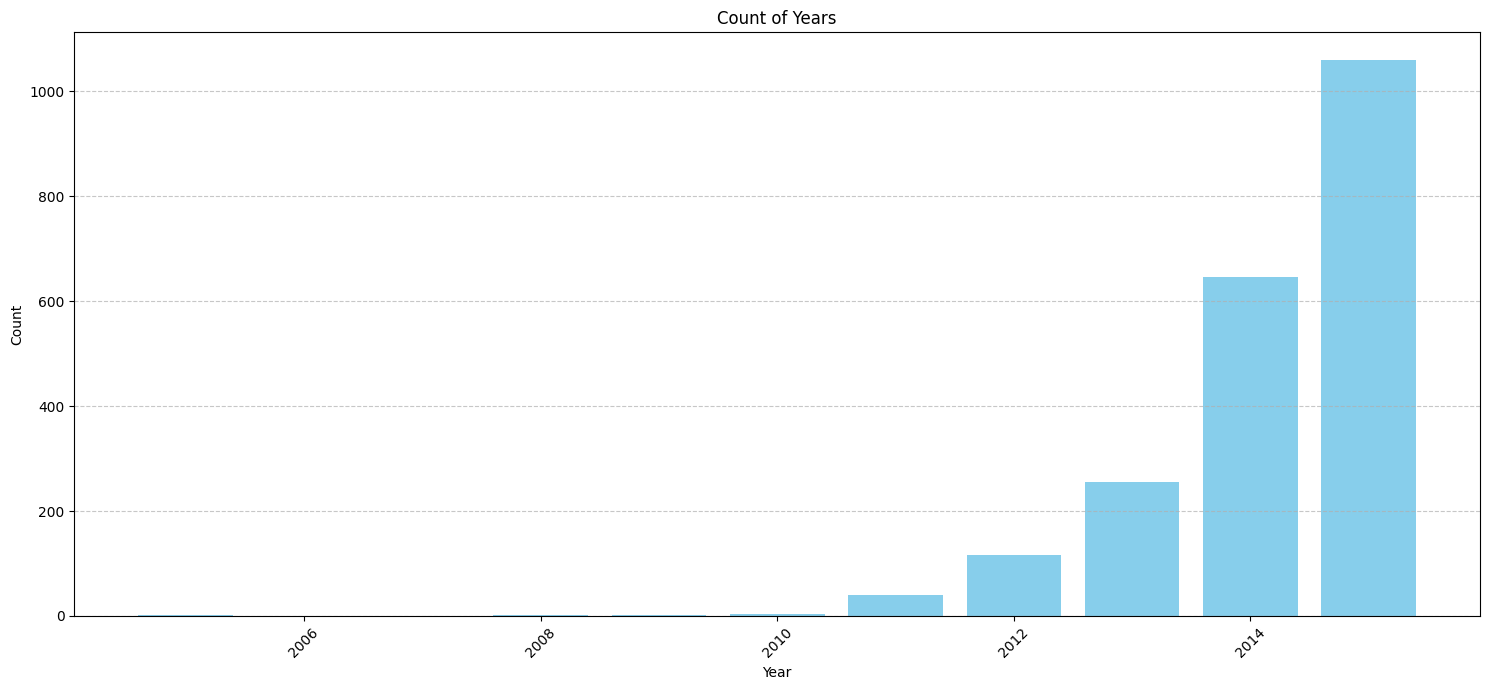

In [44]:
plt.figure(figsize=(15, 7))
plt.bar(year_counts_sorted.index, year_counts_sorted.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

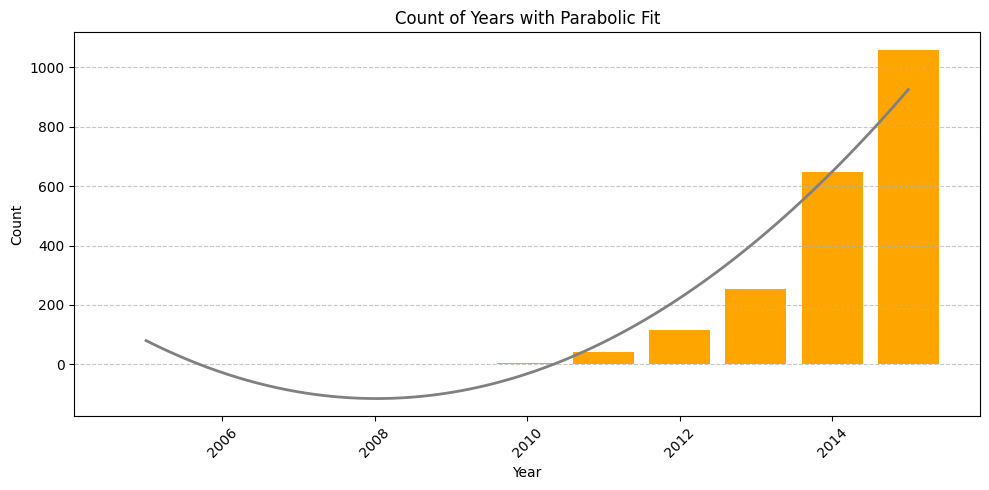

In [45]:
x = year_counts_sorted.index
y = year_counts_sorted.values

coefficients = np.polyfit(x, y,2)
poly = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x),100)
y_fit = poly(x_fit)

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='orange')

plt.plot(x_fit, y_fit, color='grey', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years with Parabolic Fit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

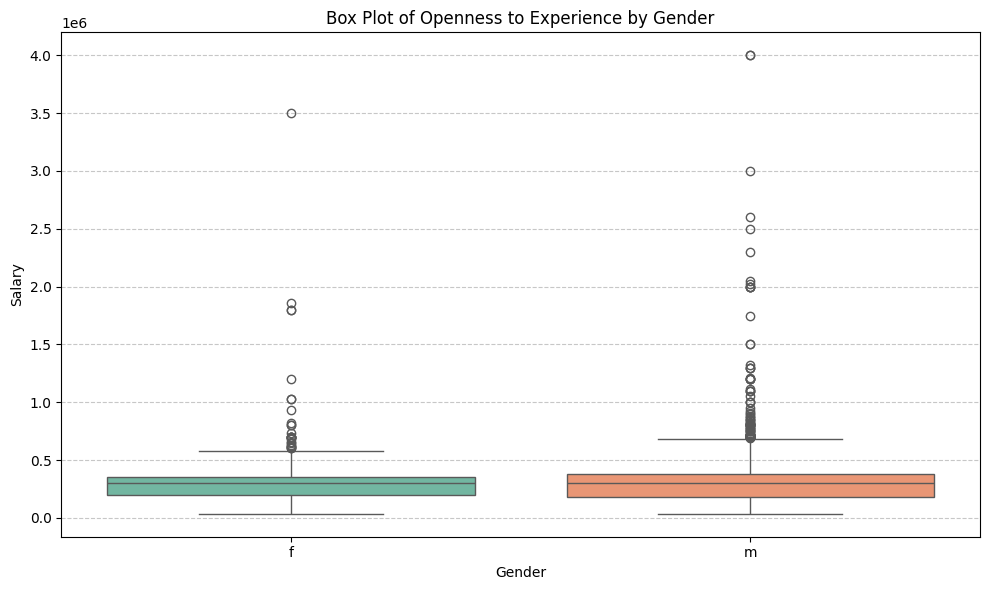

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df, hue='Gender', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Box Plot of Openness to Experience by Gender')
plt.yscale('linear')
plt.tight_layout()
plt.show()

#### removing outliers

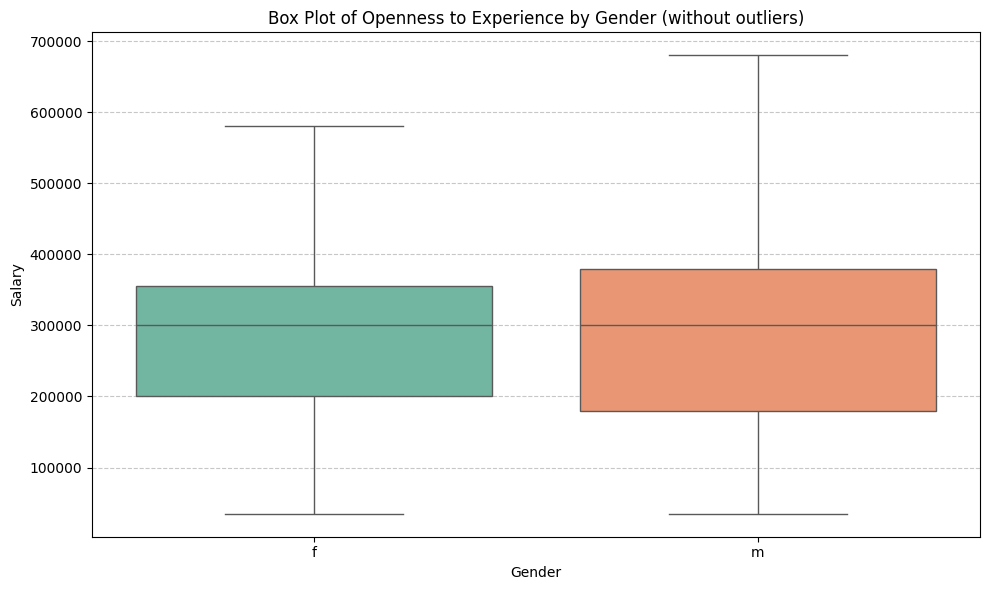

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df, hue='Gender', palette='Set2', showfliers=False)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Box Plot of Openness to Experience by Gender (without outliers)')
plt.yscale('linear')
plt.tight_layout()
plt.show()

## Consider qualities of employee and find avg. Compare between female and male

In [48]:
df["avg_quality"] = (df["conscientiousness"] + df["agreeableness"] + df["extraversion"] + df["nueroticism"] + df["openess_to_experience"])/5

df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,avg_quality
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,0.644560
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,0.328220
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,0.390060
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,-0.256000
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,-0.453574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,0.040720
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0.438680
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,-1.337760
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,-0.203940


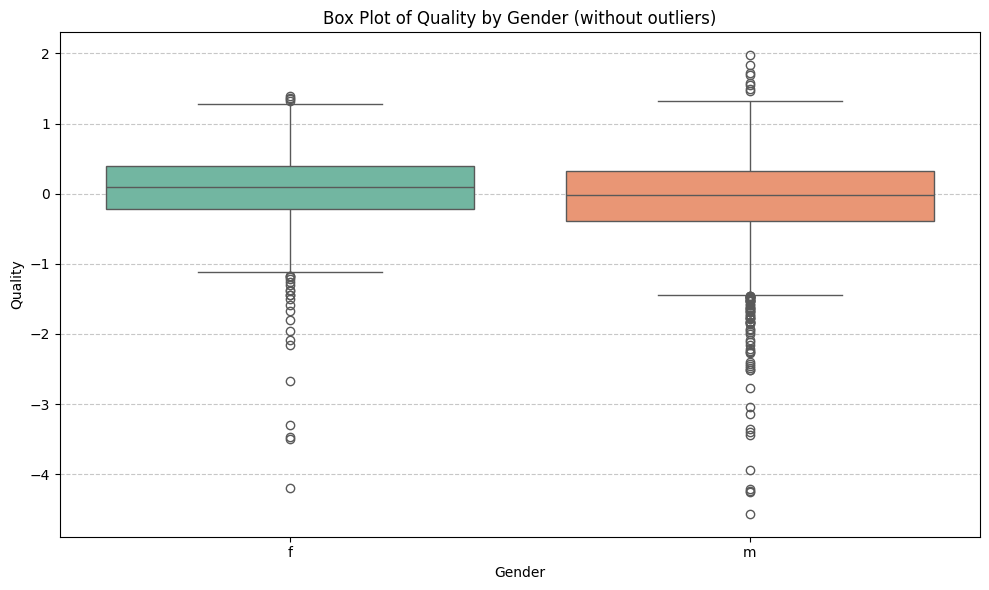

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='avg_quality', data=df, hue='Gender', palette='Set2', )
plt.xlabel('Gender')
plt.ylabel('Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Box Plot of Quality by Gender (without outliers)')
plt.tight_layout()
plt.show()

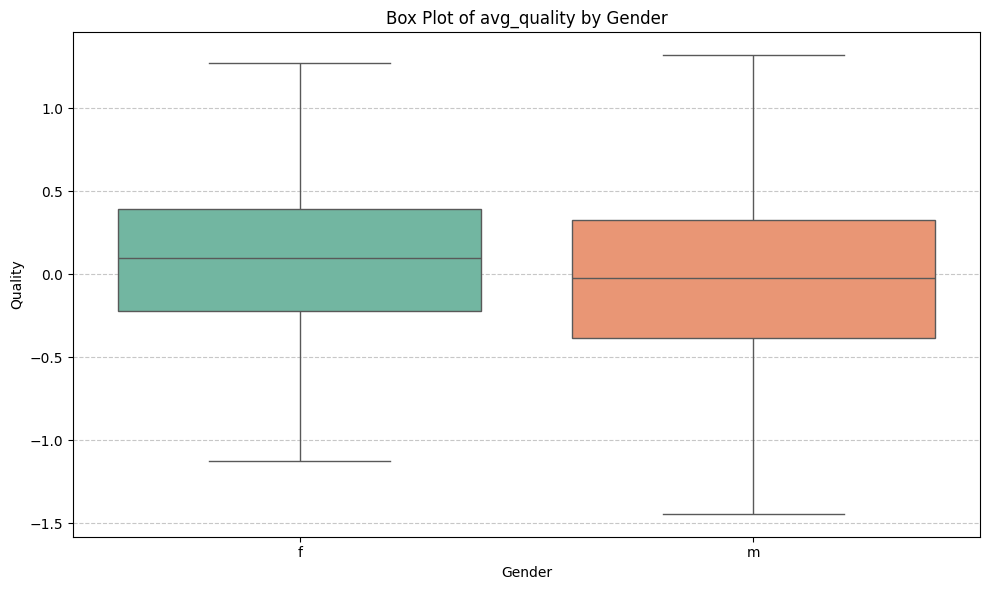

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='avg_quality', data=df, hue='Gender', palette='Set2', showfliers=False)
plt.xlabel('Gender')
plt.ylabel('Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Box Plot of avg_quality by Gender')
plt.tight_layout()
plt.show()

## Plot the Salary quality graph

In [51]:
df["avg_quality"]

0       0.644560
1       0.328220
2       0.390060
3      -0.256000
4      -0.453574
          ...   
3993    0.040720
3994    0.438680
3995   -1.337760
3996   -0.203940
3997   -0.260874
Name: avg_quality, Length: 3998, dtype: float64

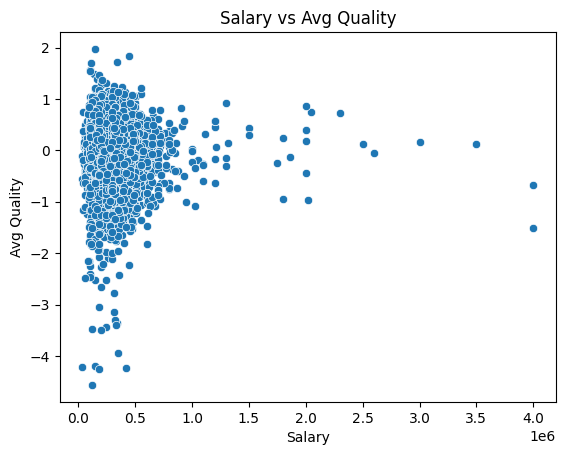

In [52]:
sns.scatterplot(data=df, x='Salary', y='avg_quality')

plt.xlabel('Salary')
plt.ylabel('Avg Quality')
plt.title('Salary vs Avg Quality')

plt.show()

# Research Quetions
## Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [53]:
df_18_1_19 = df[(df["DOJ"] < "18/1/19 0:00") & (df["Specialization"] == "computer science & engineering") & (df["Designation"].isin(["programming analyst", "software engineer", "hardware engineer", "associate engineer"]))]

df_18_1_19


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,avg_quality
113,train,1087220,340000.0,1/1/15 0:00,present,software engineer,Hyderabad,m,4/18/91 0:00,91.43,...,-1,-1,-1,-1,0.4155,0.3789,-0.1437,-0.74150,-0.2859,-0.075340
115,train,815219,330000.0,12/1/13 0:00,4/1/15 0:00,software engineer,Chennai,m,1/13/92 0:00,76.17,...,-1,-1,-1,-1,0.4155,-0.7866,-1.2196,1.16010,-1.8189,-0.449900
205,train,1171130,325000.0,1/1/15 0:00,present,software engineer,Noida,m,3/21/92 0:00,80.60,...,-1,-1,-1,-1,-2.0262,-0.7866,0.0100,-0.23440,-1.0524,-0.817920
290,train,1009094,560000.0,11/1/14 0:00,present,software engineer,Bangalore,m,12/17/91 0:00,89.42,...,-1,-1,-1,-1,-0.8772,0.2124,-1.5270,0.14590,-1.2440,-0.657980
328,train,1203085,785000.0,10/1/14 0:00,present,software engineer,Bangalore,m,10/20/91 0:00,84.83,...,-1,-1,-1,-1,0.7027,1.0449,1.5470,-1.62890,-0.6692,0.199300
432,train,896469,475000.0,12/1/14 0:00,5/1/15 0:00,software engineer,Bangalore,m,5/29/92 0:00,86.88,...,-1,-1,-1,-1,0.9900,0.3789,0.0100,1.28690,0.4805,0.629260
499,train,845544,300000.0,11/1/14 0:00,5/1/15 0:00,software engineer,Thiruvananthapuram,f,12/4/92 0:00,90.00,...,-1,-1,-1,-1,0.7027,0.7119,1.5470,-0.61470,1.0554,0.680460
603,train,820700,265000.0,1/1/15 0:00,present,software engineer,Noida,m,2/5/92 0:00,71.00,...,-1,-1,-1,-1,-0.0154,0.0459,0.1637,-0.48790,0.0973,-0.039280
704,train,552730,375000.0,1/1/14 0:00,present,software engineer,Hyderabad,f,3/7/92 0:00,69.00,...,-1,-1,-1,-1,0.5591,0.2124,-0.4511,-1.37530,0.6721,-0.076560
723,train,958388,420000.0,11/1/13 0:00,present,software engineer,Pune,m,10/2/91 0:00,74.00,...,-1,-1,-1,-1,0.2718,0.2124,1.5470,-1.12180,0.8637,0.354620


In [54]:
df_18_1_19["Designation"].unique()

array(['software engineer'], dtype=object)

### The candidates choosing only software engineering, after the specialization computer science and engineering

In [55]:
df_18_1_19["Salary"].mean()

348043.47826086957

### The Avg Salary of the candidates is 348043.47826086957 which is more than 3 Lakhs
## So the claim fails

## Let's check the claim after Jan 18, 2019

In [56]:
df18_1_19 = df[(df["DOJ"] >= "18/1/19 0:00") & (df["Specialization"] == "computer science & engineering") & (df["Designation"].isin(["programming analyst", "software engineer", "hardware engineer", "associate engineer"]))]

df18_1_19


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,avg_quality
31,train,1094324,340000.0,8/1/14 0:00,4/1/15 0:00,software engineer,Bangalore,m,10/23/92 0:00,77.20,...,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,0.213740
48,train,338428,390000.0,9/1/13 0:00,present,software engineer,Bangalore,m,2/28/91 0:00,86.60,...,-1,-1,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024,-0.263814
52,train,794209,400000.0,4/1/15 0:00,present,software engineer,Navi Mumbai,m,3/9/92 0:00,85.20,...,-1,-1,-1,-1,1.1336,0.3789,1.0859,0.65300,0.2889,0.708060
55,train,989860,250000.0,8/1/14 0:00,present,software engineer,Mangalore,m,2/13/92 0:00,90.80,...,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.16010,-0.4776,0.158860
130,train,902366,325000.0,9/1/14 0:00,present,software engineer,Greater Noida,m,1/10/92 0:00,82.80,...,-1,-1,-1,-1,-0.1590,0.0459,0.7785,-1.12180,-0.0943,-0.110140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,train,864107,145000.0,8/1/14 0:00,present,software engineer,-1,f,3/4/91 0:00,69.00,...,-1,-1,-1,-1,-0.7335,0.7119,0.7785,-0.48790,0.6721,0.188220
3818,train,1089624,240000.0,2/1/14 0:00,present,software engineer,Mumbai,f,9/8/91 0:00,73.80,...,-1,-1,-1,-1,0.1282,0.5454,0.3174,-0.23440,-0.2859,0.094140
3939,train,716325,100000.0,7/1/13 0:00,12/1/14 0:00,software engineer,Hyderabad,m,7/5/92 0:00,65.00,...,-1,-1,-1,-1,-0.3027,-1.9521,-0.6048,1.16010,-1.8189,-0.703680
3981,train,1077872,220000.0,9/1/14 0:00,present,software engineer,Gurgaon,m,12/17/91 0:00,53.40,...,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386,0.002840


In [57]:
df18_1_19["Designation"].unique()

array(['software engineer', 'associate engineer'], dtype=object)

### The candidates choosing only software engineering and also associate engineering, after the specialization computer science and engineering

In [58]:
df18_1_19["Salary"].mean()

325631.5789473684

### The Avg Salary of the candidates is 325631.5789473684 which is also more than 3 Lakhs

## Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

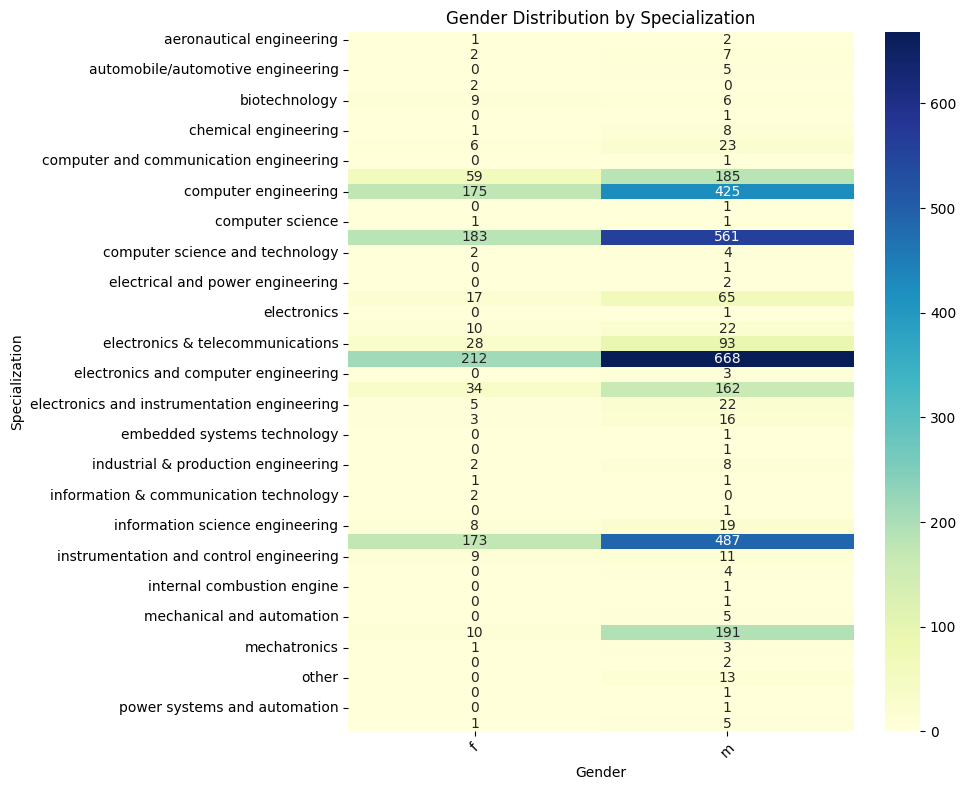

In [59]:
specialization_counts = df.groupby(['Specialization', 'Gender']).size().unstack(fill_value=0)

# Plotting heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(specialization_counts, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Gender Distribution by Specialization')
plt.xlabel('Gender')
plt.ylabel('Specialization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

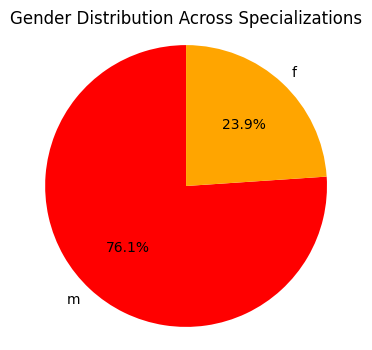

In [60]:
gender_counts = df['Gender'].value_counts()

# Plotting pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['red', 'orange'], startangle=90)
plt.title('Gender Distribution Across Specializations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

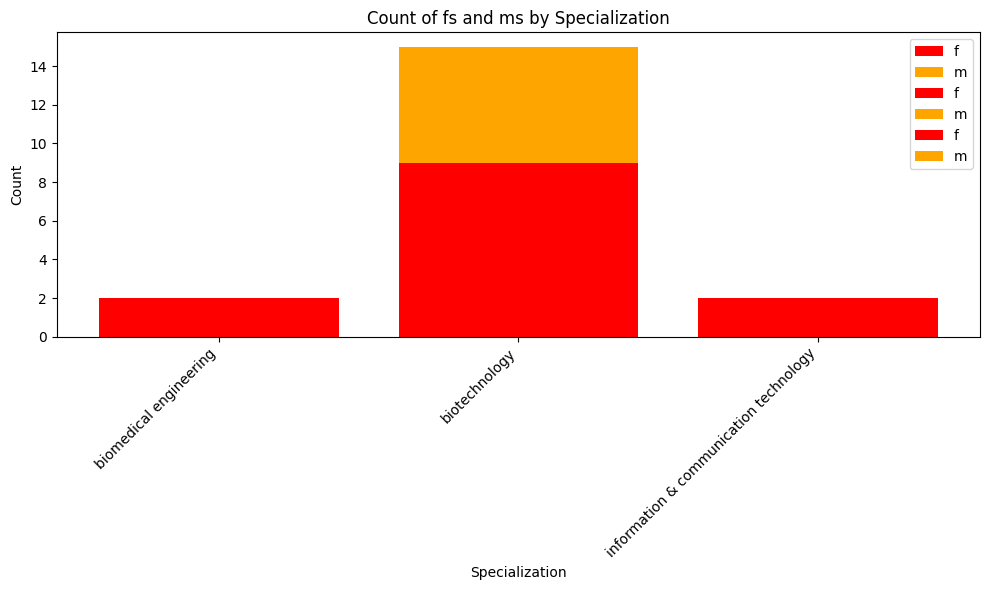

In [61]:
Gender_counts = df.groupby(['Specialization', 'Gender']).size().unstack(fill_value=0)

f_outnumber = Gender_counts['f'] > Gender_counts['m']

Specializations_f_outnumber = f_outnumber[f_outnumber].index.tolist()

plt.figure(figsize=(10, 6))

for Specialization in Specializations_f_outnumber:
    f_count = Gender_counts.loc[Specialization, 'f']
    m_count = Gender_counts.loc[Specialization, 'm']
    plt.bar(Specialization, f_count, color='red', label='f')
    plt.bar(Specialization, m_count, bottom=f_count, color='orange', label='m')

plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Count of fs and ms by Specialization')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
gender_counts = df.groupby(['Specialization', 'Gender']).size().unstack(fill_value=0)

total_counts = gender_counts.sum()

most_chosen_specialization_female = total_counts['f'].max()
most_chosen_specialization_male = total_counts['m'].max()

print("Specialization chosen by the most women:", most_chosen_specialization_female)
print("Specialization chosen by the most men:", most_chosen_specialization_male)

Specialization chosen by the most women: 957
Specialization chosen by the most men: 3041


In [63]:
female_df = df[df['Gender'] == 'f']

specialization_counts = female_df['Specialization'].value_counts()

specialization = specialization_counts.idxmax()
number_of_women = specialization_counts.max()

print("Women =",specialization,":", number_of_women)

Women = electronics and communication engineering : 212


In [64]:
male_df = df[df['Gender'] == 'm']

specialization_counts = male_df['Specialization'].value_counts()

specialization = specialization_counts.idxmax()
number_of_women = specialization_counts.max()

print("Men =",specialization,":", number_of_women)

Men = electronics and communication engineering : 668


## There is no relation between the gender and specialization